# 11. Neural Networks with MNIST

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np
import random

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 11.1 Prepare MNIST Data

In [3]:
train_data = dsets.MNIST(root='data/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)

test_data = dsets.MNIST(root='data/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

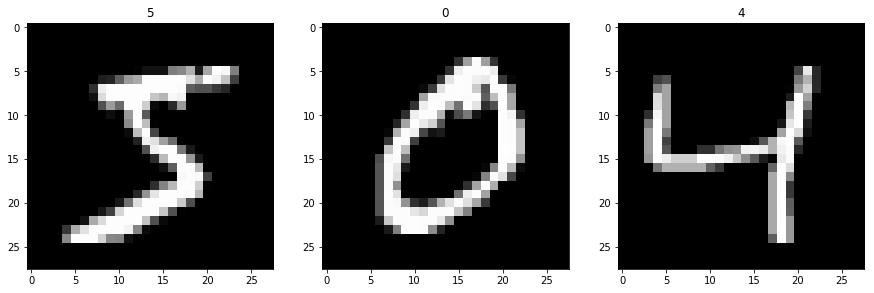

In [4]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.set_title(train_data.targets[0].item())
ax1.imshow(train_data.data[0,:,:].numpy(), cmap='gray')

ax2.set_title(train_data.targets[1].item())
ax2.imshow(train_data.data[1,:,:].numpy(), cmap='gray')

ax3.set_title(train_data.targets[2].item())
ax3.imshow(train_data.data[2,:,:].numpy(), cmap='gray')

## 11.2 Make Batch Loader

In [5]:
batch_size = 100

train_loader  = DataLoader(dataset=train_data,
                           batch_size=batch_size,
                           shuffle=True)

In [6]:
batch_images, batch_labels = iter(train_loader).next()
print(batch_labels.numpy(), ", ", len(batch_labels.numpy()))

[2 8 7 9 2 2 8 4 1 0 6 6 9 3 1 0 3 9 8 7 8 5 7 9 8 7 1 1 3 3 7 0 2 4 4 4 7
 1 8 8 1 2 4 1 7 5 9 7 2 4 4 6 7 5 1 7 3 8 6 4 2 6 6 3 8 1 9 6 9 1 0 3 2 3
 2 4 7 9 4 6 1 2 2 4 1 5 4 3 6 5 8 2 6 9 9 2 7 1 6 5] ,  100


## 11.3 Define Model

In [7]:
model = nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
)

In [8]:
loss = nn.CrossEntropyLoss()
# def cross_entropy(input, target, weight=None, size_average=True, ignore_index=-100, reduce=True):

# Args:
#     input: Variable :math:`(N, C)` where `C = number of classes`
#     target: Variable :math:`(N)` where each value is
#         `0 <= targets[i] <= C-1`
#     weight (Tensor, optional): a manual rescaling weight given to each

In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.001)

## 11.4 Train Model

In [10]:
num_epochs = 5

In [11]:
for epoch in range(num_epochs):
    
    total_batch = len(train_data) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images.view(-1, 28 * 28)
        Y = batch_labels
        
        pre = model(X)
        cost = loss(pre, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i+1) % 300 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))
    
print("Learning Finished!")

Epoch [1/5], lter [300/600], Loss: 2.2339
Epoch [1/5], lter [600/600], Loss: 2.1724
Epoch [2/5], lter [300/600], Loss: 2.1140
Epoch [2/5], lter [600/600], Loss: 2.0447
Epoch [3/5], lter [300/600], Loss: 1.9354
Epoch [3/5], lter [600/600], Loss: 1.7694
Epoch [4/5], lter [300/600], Loss: 1.7353
Epoch [4/5], lter [600/600], Loss: 1.5700
Epoch [5/5], lter [300/600], Loss: 1.5151
Epoch [5/5], lter [600/600], Loss: 1.4449
Learning Finished!


## 11.5 Test Model

In [12]:
correct = 0
total = 0

for images, labels in test_data:
    
    images  = images.view(-1, 28 * 28)
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    total += 1
    correct += (predicted == labels).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))

Accuracy of test images: 78.510000 %


In [13]:
r = random.randint(0, len(test_data)-1)
X_single_data = test_data.data[r:r + 1].view(-1,28*28).float()
Y_single_data = test_data.targets[r:r + 1]

Label :  [7]
Prediction :  [9]


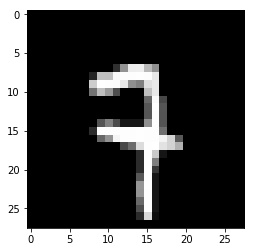

In [14]:
single_pre = model(X_single_data)
plt.imshow(X_single_data.data.view(28,28).numpy(), cmap='gray')

print('Label : ', Y_single_data.data.view(1).numpy())
print('Prediction : ', torch.max(single_pre.data, 1)[1].numpy())

## 11.6 Black Box

Prediction :  [0]


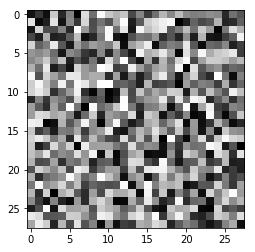

In [15]:
blackbox = torch.rand(X_single_data.size())
blackbox_pre = model(blackbox)

plt.imshow(blackbox.data.view(28,28).numpy(), cmap='gray')

print('Prediction : ', torch.max(blackbox_pre.data, 1)[1].numpy())

# 추가

Xavier Initialization 추가해서 MNIST 돌려봄.   
참고링크:   
* https://github.com/deeplearningzerotoall/PyTorch/blob/master/lab-09_3_mnist_nn_xavier.ipynb

In [17]:
linear1 = nn.Linear(784, 512, bias=True)
linear2 = nn.Linear(512, 10, bias=True)
relu = nn.ReLU()

In [18]:
nn.init.xavier_uniform_(linear1.weight)
nn.init.xavier_uniform_(linear2.weight)

Parameter containing:
tensor([[ 0.0044, -0.0300, -0.1058,  ..., -0.0234, -0.0102,  0.0228],
        [-0.0929,  0.0519, -0.0779,  ..., -0.0280,  0.0876,  0.0860],
        [ 0.0479,  0.0098, -0.0365,  ...,  0.0907, -0.0464,  0.0214],
        ...,
        [-0.0528, -0.0967,  0.0117,  ..., -0.0206,  0.0088, -0.0074],
        [ 0.0010, -0.0524,  0.0348,  ..., -0.0872, -0.0451, -0.0771],
        [-0.0779,  0.0907,  0.1056,  ...,  0.1053, -0.0410,  0.0143]],
       requires_grad=True)

In [19]:
model = nn.Sequential(linear1, relu, linear2)
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [20]:
# train
num_epochs = 5
for epoch in range(num_epochs):
    
    total_batch = len(train_data) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images.view(-1, 28 * 28)
        Y = batch_labels
        
        pre = model(X)
        cost = loss(pre, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i+1) % 300 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))
    
print("Learning Finished!")

Epoch [1/5], lter [300/600], Loss: 0.9318
Epoch [1/5], lter [600/600], Loss: 0.5867
Epoch [2/5], lter [300/600], Loss: 0.3331
Epoch [2/5], lter [600/600], Loss: 0.3523
Epoch [3/5], lter [300/600], Loss: 0.4221
Epoch [3/5], lter [600/600], Loss: 0.4100
Epoch [4/5], lter [300/600], Loss: 0.2930
Epoch [4/5], lter [600/600], Loss: 0.2789
Epoch [5/5], lter [300/600], Loss: 0.4028
Epoch [5/5], lter [600/600], Loss: 0.3769
Learning Finished!


In [21]:
correct = 0
total = 0

for images, labels in test_data:
    
    images  = images.view(-1, 28 * 28)
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    total += 1
    correct += (predicted == labels).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))

Accuracy of test images: 91.710000 %


Accuracy의 증가 확인